# NRTK Perturber Functionality

This is a simple notebook demonstrating the use of the `nrtk` perturbers.

## Table Of Contents

* [Environment Setup](#environment-setup)
* [Initial Image](#init-image)
* [`scikit-image` Perturbers](#scikit-image-perturbers)
    * [Salt Noise Perturber](#salt-noise-perturber)
    * [Pepper Noise Perturber](#pepper-noise-perturber)
    * [Salt and Pepper Noise Perturber](#salt-and-pepper-noise-perturber)
    * [Gaussian Noise Perturber](#gaussian-noise-perturber)
    * [Speckle Noise Perturber](#speckle-noise-perturber)
* [OpenCV Perturbers](#opencv-perturbers)
    * [Average Blur Perturber](#average-blur-perturber)
    * [Gaussian Blur Perturber](#gaussian-blur-perturber)
    * [Median Blur Perturber](#median-blur-perturber)
* [PIL Perturbers](#pil-perturbers)
    * [Brightness Perturber](#brightness-perturber)
    * [Color Perturber](#color-perturber)
    * [Contrast Perturber](#contrast-perturber)
    * [Sharpness Perturber](#sharpness-perturber)

## Environment Setup <a name="environment-setup"></a>

In [1]:
import sys

!{sys.executable} -m pip install -qU pip
print("Installing matplotlib...")
!{sys.executable} -m pip install -q matplotlib
print("Done!")

Installing matplotlib...
Done!


In [2]:
%matplotlib inline
%config InlineBackend.figure_format = "jpeg"  # Use JPEG format for inline visualizations
from matplotlib import pyplot as plt  # type: ignore
from matplotlib.axes import Axes  # type: ignore

import numpy as np
import os
import urllib.request
from PIL import Image
from typing import TYPE_CHECKING, Any, Dict

from nrtk.impls.perturb_image.generic.skimage.random_noise import (
    SaltNoisePerturber,
    PepperNoisePerturber,
    SaltAndPepperNoisePerturber,
    GaussianNoisePerturber,
    SpeckleNoisePerturber
)
from nrtk.impls.perturb_image.generic.cv2.blur import (
    AverageBlurPerturber,
    GaussianBlurPerturber,
    MedianBlurPerturber
)
from nrtk.impls.perturb_image.generic.PIL.enhance import (
    BrightnessPerturber,
    ColorPerturber,
    ContrastPerturber,
    SharpnessPerturber
)

## Initial Image <a name="init-image"></a>

We'll carry out perturbations on a singular image from Visdrone.

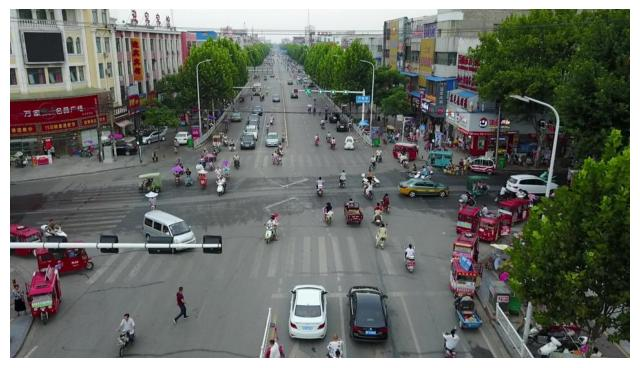

In [3]:
data_dir = './data'
os.makedirs(data_dir, exist_ok=True)

url = 'https://data.kitware.com/api/v1/item/623880f14acac99f429fe3ca/download'

img_path = os.path.join(data_dir, 'visdrone_img.jpg')
if not os.path.isfile(img_path):
    _ = urllib.request.urlretrieve(url, img_path)
    
img = np.asarray(Image.open(img_path))

plt.figure(figsize=(8,8))
plt.axis('off')
_ = plt.imshow(img)

We'll also define a couple of helper functions for displaying our perturbations.

In [4]:
def display(img: np.ndarray, descriptor: str=""):  
    fig, axs = plt.subplots(figsize=(8, 8))
    if TYPE_CHECKING:
        assert(isinstance(axs, Axes))
    axs.set_title(descriptor)
    axs.imshow(img)
    axs.axis("off")

In [5]:
def config_to_str(config: Dict[str, Any]) -> str:
    out = ", ".join([f"{k}={v}" for k, v in config.items()])
    return f"({out})"     

## `scikit-image` Perturbers <a name="scikit-image-perturbers"></a>

First, we'll look at our `scikit-image` random noise perturbers. For all of these perturbers, we can specify a psuedo-random number generator (RNG) or seed if results need to be reproducible.

### Salt Noise Perturber <a name="salt-noise-perturber"></a>

The `SaltNoisePerturber` replaces random pixels with 1.

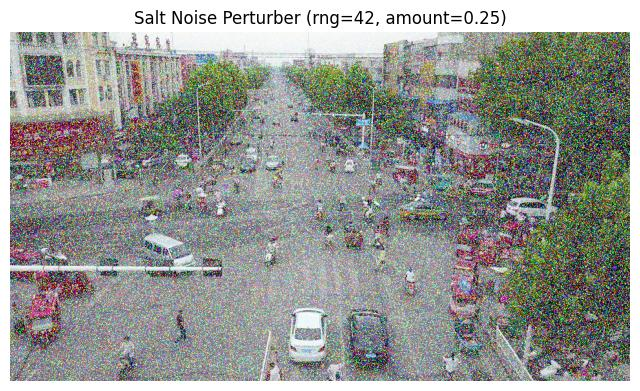

In [6]:
seed = 42
amount = 0.25

salt_noise_perturber = SaltNoisePerturber(
    rng=seed,
    amount=amount
)
salt_noise_out = salt_noise_perturber(img)
display(salt_noise_out, f"Salt Noise Perturber {config_to_str(salt_noise_perturber.get_config())}")

Since we specified a seed, we can confirm that our results are reproducible:

In [7]:
salt_noise_perturber2 = SaltNoisePerturber(
    rng=seed,
    amount=amount
)
salt_noise_out2 = salt_noise_perturber2(img)
print(np.array_equal(salt_noise_out, salt_noise_out2))
assert np.array_equal(salt_noise_out, salt_noise_out2)

True


### Pepper Noise Perturber <a name="pepper-noise-perturber"></a>

The `PepperNoisePerturber` replaces random pixels with 0 (for unsigned images) or -1 (for signed images).

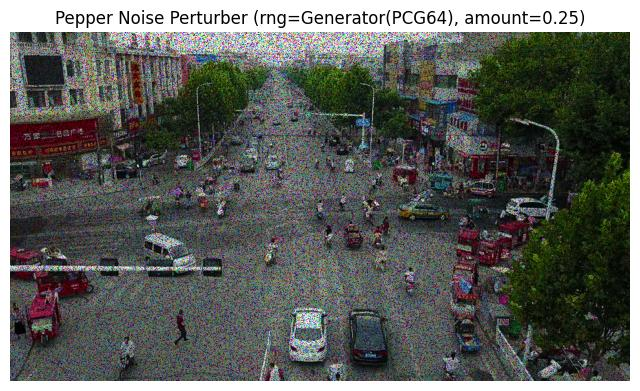

In [8]:
seed = 42
amount = 0.25

pepper_noise_perturber = PepperNoisePerturber(
    rng=np.random.default_rng(seed),
    amount=amount
)
pepper_noise_out = pepper_noise_perturber(img)
display(pepper_noise_out, f"Pepper Noise Perturber {config_to_str(pepper_noise_perturber.get_config())}")

Again, we can confirm that our results are reproducible, but this time we're directly using a generator:

In [9]:
pepper_noise_perturber2 = PepperNoisePerturber(
    rng=np.random.default_rng(seed),
    amount=amount
)
pepper_noise_out2 = pepper_noise_perturber2(img)
print(np.array_equal(pepper_noise_out, pepper_noise_out2))
assert np.array_equal(pepper_noise_out, pepper_noise_out2)

True


### Salt and Pepper Noise Perturber <a name="salt-and-pepper-noise-perturber"></a>

The `SaltAndPepperNoisePerturber` replaces random pixels with either salt or pepper noise. Just as before, reproducibility is possible with the `rng` parameter, but we won't continue to demonstrate that.

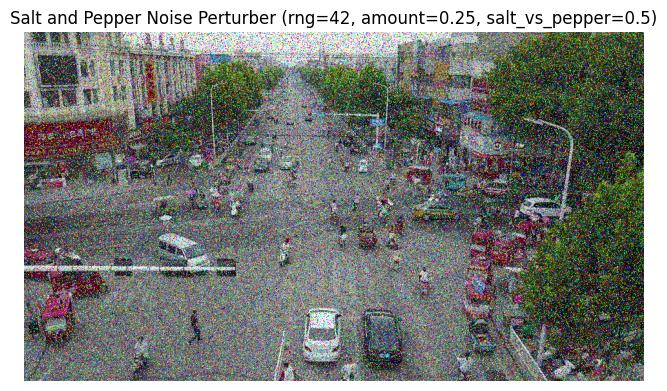

In [10]:
seed = 42
amount = 0.25
salt_vs_pepper = 0.5

sp_noise_perturber = SaltAndPepperNoisePerturber(
    rng=seed,
    amount=amount,
    salt_vs_pepper=salt_vs_pepper
)
sp_noise_out = sp_noise_perturber(img)
display(sp_noise_out, f"Salt and Pepper Noise Perturber {config_to_str(sp_noise_perturber.get_config())}")

### Gaussian Noise Perturber <a name="gaussian-noise-perturber"></a>

The `GaussianNoisePerturber` adds Gaussian-distributed noise to the given image.

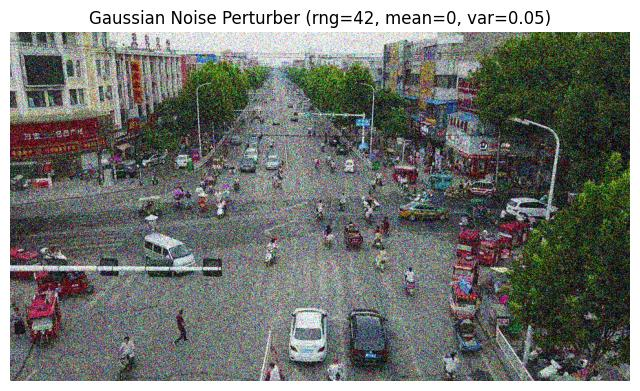

In [11]:
seed = 42
mean = 0
var = 0.05

gaussian_noise_perturber = GaussianNoisePerturber(
    rng=seed,
    mean=mean,
    var=var
)
gaussian_noise_out = gaussian_noise_perturber(img)
display(gaussian_noise_out, f"Gaussian Noise Perturber {config_to_str(gaussian_noise_perturber.get_config())}")

### Speckle Noise Perturber <a name="speckle-noise-perturber"></a>

The `SpeckleNoisePerturber` adds multiplicative, Gaussian-distributed noise to the given image.

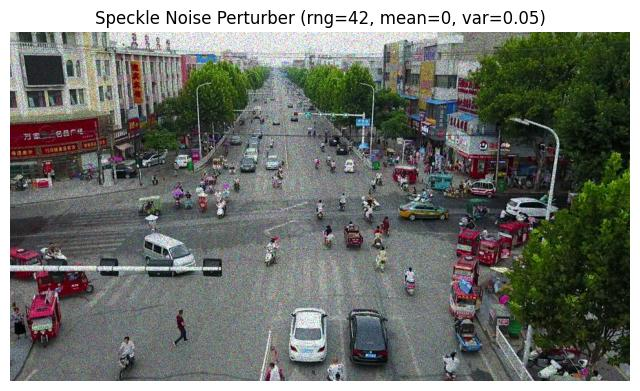

In [12]:
seed = 42
mean = 0
var = 0.05

speckle_noise_perturber = SpeckleNoisePerturber(
    rng=seed,
    mean=mean,
    var=var
)
speckle_noise_out = speckle_noise_perturber(img)
display(speckle_noise_out, f"Speckle Noise Perturber {config_to_str(speckle_noise_perturber.get_config())}")

## OpenCV Perturbers <a name="opencv-perturbers"></a>

Next, we'll look at our OpenCV blur perturbers.

### Average Blur Perturber <a name="average-blur-perturber"></a>

The `AverageBlurPerturber` applies "average" blurring to the image stimulus. To achieve this, OpenCV convolves the image with a normalized box filter, so the average of the pixels under the kernel replaces the central element.

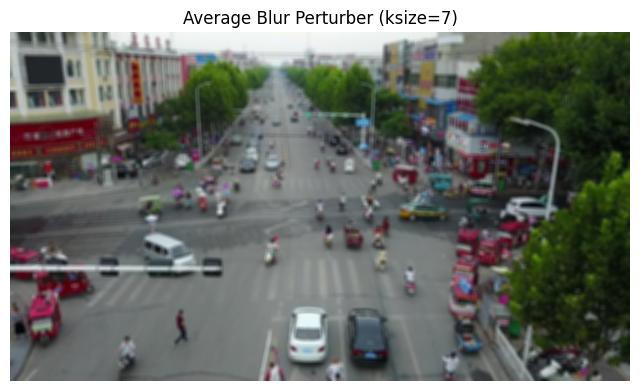

In [13]:
ksize = 7

avg_blur_perturber = AverageBlurPerturber(
    ksize=ksize
)
avg_blur_out = avg_blur_perturber(img)
display(avg_blur_out, f"Average Blur Perturber {config_to_str(avg_blur_perturber.get_config())}")

### Gaussian Blur Perturber <a name="gaussian-blur-perturber"></a>

The `GaussianBlurPerturber` applies Gaussian blurring to the image stimulus by using a Gaussian kernel instead of a normalized box filter.

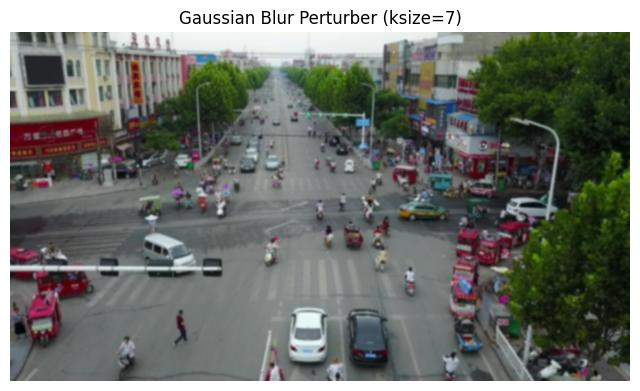

In [14]:
ksize = 7

gaussian_blur_perturber = GaussianBlurPerturber(
    ksize=ksize
)
gaussian_blur_out = gaussian_blur_perturber(img)
display(gaussian_blur_out, f"Gaussian Blur Perturber {config_to_str(gaussian_blur_perturber.get_config())}")

### Median Blur Perturber <a name="median-blur-perturber"></a>

The `MedianBlurPerturber` applies median blurring to the image stimulus, where the central element is replaced with the median value of the pixels under the kernel.

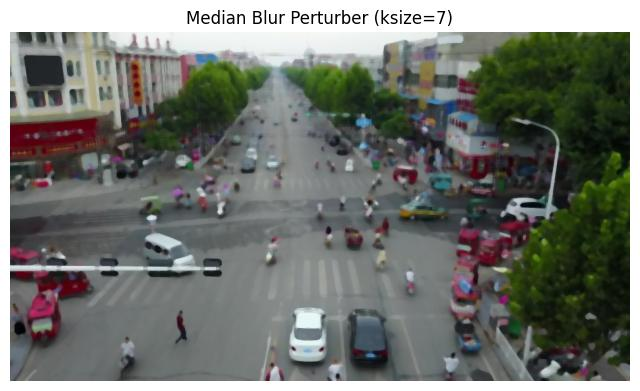

In [15]:
ksize = 7

median_blur_perturber = MedianBlurPerturber(
    ksize=ksize
)
median_blur_out = median_blur_perturber(img)
display(median_blur_out, f"Median Blur Perturber {config_to_str(median_blur_perturber.get_config())}")

## PIL Perturbers <a name="pil-perturbers"></a>

Next, we'll look at our PIL enhance perturbers. A factor of 1.0 returns a copy of the original image, lower factor values mean less of the relevant enhancement (e.g. brightness) while higher values mean more.

### Brightness Perturber <a name="brightness-perturber"></a>

The `BrightnessPerturber` adjusts the given image stimulus' brightness. 

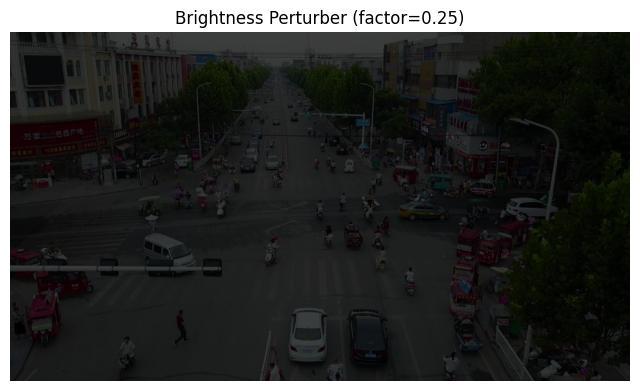

In [16]:
factor = 0.25

brightness_perturber = BrightnessPerturber(
    factor=factor
)
brightness_out = brightness_perturber(img)
display(brightness_out, f"Brightness Perturber {config_to_str(brightness_perturber.get_config())}")

### Color Perturber <a name="color-perturber"></a>

The `ColorPerturber` adjusts the given image stimulus' color balance. 

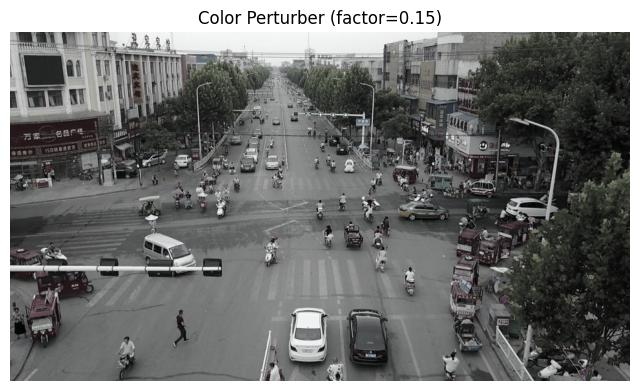

In [17]:
factor = 0.15

color_perturber = ColorPerturber(
    factor=factor
)
color_out = color_perturber(img)
display(color_out, f"Color Perturber {config_to_str(color_perturber.get_config())}")

### Contrast Perturber <a name="contrast-perturber"></a>

The `ContrastPerturber` adjusts the given image stimulus' contrast. 

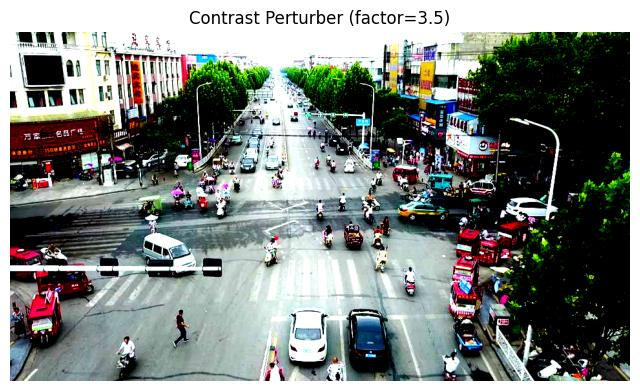

In [18]:
factor = 3.5

contrast_perturber = ContrastPerturber(
    factor=factor
)
contrast_out = contrast_perturber(img)
display(contrast_out, f"Contrast Perturber {config_to_str(contrast_perturber.get_config())}")

### Sharpness Perturber <a name="sharpness-perturber"></a>

The `SharpnessPerturber` adjusts the given image stimulus' sharpness. The sharpness factor is limited to [0.0, 2.0]. 

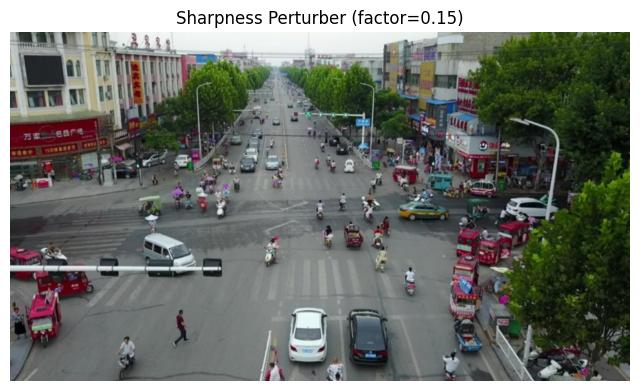

In [19]:
factor = 0.15

sharpness_perturber = SharpnessPerturber(
    factor=factor
)
sharpness_out = sharpness_perturber(img)
display(sharpness_out, f"Sharpness Perturber {config_to_str(sharpness_perturber.get_config())}")